In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import  roc_curve, auc, classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load pre-processed data
SG_CRC_BA = pd.read_csv("SG_CRC_BA.csv", index_col=0, delimiter=",")
SG_CRC_BA = SG_CRC_BA.drop(['TMB', 'KRAS', 'BRAF', 'NRAS', 'TP53', 'APC', 'PIK3CA',
       'PIK3R1', 'SMAD4', 'ERBB4', 'RNF43', 'ZNRF3', 'KIT', 'TGFBR2',
       'Vital.status', 'MSI.Status', 'CRIS', 'Gender', 'Age.at.Diagnosis',
       'Site.of.Primary.Colorectal.tumour', 'Side', 'Grade', 'TNM', 'Stage',
       'iCMS', 'CMS', 'group3', 'group5'], axis = 1)
SG_CRC_BA['Condition'] = 'CRC'

SG_CRC_BA

,g__Acetivibrio,g__Acetobacterium,g__Acetobacteroides,g__Acidaminococcus,g__Actinobacillus,g__Actinomyces,g__Acutalibacter,g__Adlercreutzia,g__Aeromonas,g__Agathobacter,...,g__Veillonella,g__Vescimonas,g__Vibrio,g__Vogesella,g__Vulcanimicrobium,g__Wansuia,g__Xenorhabdus,g__Yersinia,g__Zobellia,Condition
patient_id,,,,,,,,,,,,,,,,,,,,,
X1030,0.000096,0.000000,0.000000,0.000048,0.000000,0.000000,0.000192,0.000000,0.000144,0.011379,...,0.038604,0.000816,0.000384,0.000000,0.000096,0.001632,0.000144,0.000192,0.000000,CRC
X106,0.000045,0.000000,0.000000,0.000119,0.000000,0.000015,0.000030,0.000030,0.000015,0.000015,...,0.000030,0.002417,0.000030,0.000060,0.000000,0.000000,0.000000,0.000000,0.000000,CRC
X1076,0.000000,0.000000,0.000000,0.000085,0.000000,0.000170,0.000000,0.000000,0.001190,0.000170,...,0.001360,0.001530,0.000340,0.000255,0.000000,0.000000,0.000000,0.000000,0.000000,CRC
X1079,0.000018,0.000027,0.000002,0.006718,0.000006,0.000010,0.000005,0.000022,0.000166,0.001404,...,0.000033,0.000146,0.000024,0.000002,0.000001,0.000102,0.000000,0.000000,0.000008,CRC
X1117,0.000000,0.000000,0.000000,0.000519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000623,...,0.000934,0.001557,0.000104,0.000208,0.000208,0.000000,0.000000,0.000104,0.000000,CRC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X1658,0.000025,0.000025,0.000025,0.000738,0.000000,0.000000,0.000000,0.000051,0.000025,0.000993,...,0.000051,0.000840,0.000051,0.000025,0.000051,0.000000,0.000025,0.000000,0.000000,CRC
X1662,0.000044,0.000049,0.000087,0.000049,0.000000,0.000005,0.000073,0.000014,0.000063,0.018181,...,0.000123,0.003509,0.000024,0.000000,0.000003,0.000078,0.000000,0.000007,0.000019,CRC
X1664,0.000000,0.000000,0.000000,0.000281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000843,...,0.000703,0.002811,0.000000,0.000000,0.000141,0.000000,0.000000,0.000141,0.000000,CRC


In [3]:
FMG_CRC_BA = pd.read_csv("FMG_CRC_BA.csv", delimiter=",")

stage_mapping = { # Map all different stages into group 'CRC patients'
    'Stage_0': 'CRC',
    'Stage_I_II': 'CRC',
    'Stage_III_IV': 'CRC',
    'MP': 'CRC',
    'HS': 'CRC',
}

FMG_CRC_BA['Group'] = FMG_CRC_BA['Group'].replace(stage_mapping)
FMG_CRC_BA = FMG_CRC_BA.drop(['Stage', 'Age', 'Gender', 'BMI', 'Brinkman Index', 'Alcohol', 'Tumor location'], axis = 1)
FMG_CRC_BA = FMG_CRC_BA[FMG_CRC_BA['Group'] == 'Healthy']
FMG_CRC_BA = FMG_CRC_BA.drop(['Group'], axis = 1)
FMG_CRC_BA['Condition'] = 'Healthy'
FMG_CRC_BA

,g__Acetanaerobacterium,g__Acetatifactor,g__Acetivibrio,g__Acidaminococcus,g__Actinobacillus,g__Actinomyces,g__Adlercreutzia,g__Aggregatibacter,g__Alistipes,g__Alkalitalea,...,g__Yonghaparkia,g__Youngiibacter,g__Yuhushiella,g__Zhihengliuella,g__Zhizhongheella,g__Zhongshania,g__Zimmermannella,g__Zobellella,g__Zoogloea,Condition
0,0.000016,0.000158,0.000519,0.000093,0.000051,0.000251,0.000856,0.000018,0.000000,0.000007,...,0.000010,0.000020,0.000006,0.000061,0.000008,0.000000,0.000017,0.000040,0.000043,Healthy
1,0.000253,0.000012,0.000380,0.002880,0.000033,0.000270,0.000492,0.000002,0.003794,0.000000,...,0.000002,0.000005,0.000000,0.000019,0.000000,0.000000,0.000002,0.000021,0.000000,Healthy
2,0.000375,0.000000,0.000462,0.000072,0.000000,0.000132,0.000568,0.000002,0.003503,0.000000,...,0.000007,0.000041,0.000000,0.000046,0.000005,0.000019,0.000010,0.000053,0.000024,Healthy
3,0.000003,0.000032,0.000079,0.002272,0.001376,0.000160,0.000273,0.000682,0.003374,0.000000,...,0.000007,0.000038,0.000000,0.000050,0.000012,0.000067,0.000007,0.000088,0.000012,Healthy
4,0.000007,0.000026,0.000646,0.000429,0.000000,0.000219,0.000051,0.000000,0.000926,0.000051,...,0.000046,0.000069,0.000029,0.000152,0.000005,0.000014,0.000033,0.000075,0.000000,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.000190,0.000019,0.000421,0.000054,0.000000,0.000044,0.000792,0.000000,0.005834,0.000006,...,0.000004,0.000014,0.000000,0.000018,0.000004,0.000000,0.000004,0.000011,0.000021,Healthy
247,0.000230,0.000006,0.000373,0.012210,0.000000,0.000017,0.000678,0.000000,0.007056,0.000017,...,0.000000,0.000023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Healthy
248,0.000121,0.000000,0.000710,0.000042,0.000156,0.001853,0.001351,0.000000,0.009557,0.000000,...,0.000021,0.000042,0.000000,0.000104,0.000000,0.000000,0.000021,0.000000,0.000000,Healthy
249,0.000112,0.000012,0.000953,0.000046,0.000018,0.000124,0.000285,0.000000,0.003699,0.000008,...,0.000002,0.000005,0.000000,0.000012,0.000065,0.000000,0.000002,0.000000,0.000012,Healthy


In [4]:
SG_FMG_HealCon = pd.concat([SG_CRC_BA, FMG_CRC_BA], axis = 0, ignore_index=True)
SG_FMG_HealCon = SG_FMG_HealCon.dropna(axis=1)
SG_FMG_HealCon

,g__Acetivibrio,g__Acidaminococcus,g__Actinobacillus,g__Actinomyces,g__Adlercreutzia,g__Alistipes,g__Anaerostipes,g__Anaerotruncus,g__Bacteroides,g__Barnesiella,...,g__Sodalis,g__Stomatobaculum,g__Streptococcus,g__Subdoligranulum,g__Veillonella,g__Vibrio,g__Vogesella,g__Xenorhabdus,g__Yersinia,Condition
0,0.000096,0.000048,0.000000,0.000000,0.000000,0.001248,0.001632,0.002257,0.021030,0.000048,...,0.000000e+00,0.000000,0.000816,0.000000,0.038604,0.000384,0.000000,0.000144,0.000192,CRC
1,0.000045,0.000119,0.000000,0.000015,0.000030,0.004551,0.000060,0.000164,0.345066,0.000015,...,0.000000e+00,0.000015,0.000403,0.000179,0.000030,0.000030,0.000060,0.000000,0.000000,CRC
2,0.000000,0.000085,0.000000,0.000170,0.000000,0.001955,0.000935,0.000085,0.069540,0.000340,...,0.000000e+00,0.001020,0.001955,0.000170,0.001360,0.000340,0.000255,0.000000,0.000000,CRC
3,0.000018,0.006718,0.000006,0.000010,0.000022,0.010152,0.000745,0.000075,0.288656,0.000022,...,3.639403e-06,0.000023,0.000383,0.000824,0.000033,0.000024,0.000002,0.000000,0.000000,CRC
4,0.000000,0.000519,0.000000,0.000000,0.000000,0.005604,0.000415,0.000208,0.252802,0.000000,...,0.000000e+00,0.000311,0.003217,0.001142,0.000934,0.000104,0.000208,0.000000,0.000104,CRC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.000421,0.000054,0.000000,0.000044,0.000792,0.005834,0.005469,0.002216,0.418848,0.000716,...,8.780000e-07,0.000046,0.001018,0.002854,0.000170,0.000000,0.000012,0.000000,0.000008,Healthy
353,0.000373,0.012210,0.000000,0.000017,0.000678,0.007056,0.003837,0.000963,0.388761,0.003368,...,2.250000e-05,0.000067,0.001505,0.023470,0.000092,0.000000,0.000000,0.000013,0.000041,Healthy
354,0.000710,0.000042,0.000156,0.001853,0.001351,0.009557,0.020411,0.000260,0.225332,0.000000,...,7.358540e-04,0.000270,0.043777,0.015384,0.005070,0.000208,0.000000,0.000000,0.000561,Healthy
355,0.000953,0.000046,0.000018,0.000124,0.000285,0.003699,0.004147,0.000403,0.073841,0.000017,...,5.820000e-05,0.000335,0.001107,0.009500,0.000205,0.000000,0.000000,0.000005,0.000022,Healthy


In [5]:
class_counts = SG_FMG_HealCon['Condition'].value_counts()
print(class_counts)

Condition
Healthy    251
CRC        106
Name: count, dtype: int64


In [6]:
# Prepare features and target variable
X = SG_FMG_HealCon.drop(['Condition'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
y = SG_FMG_HealCon['Condition']
print("Unique values of y:", np.unique(y))
le = LabelEncoder()
y = le.fit_transform(y)
y
print("Unique values of y:", np.unique(y))
print("Shape of y:", X_scaled.shape)
print("Shape of y:", y.shape)

Unique values of y: ['CRC' 'Healthy']
Unique values of y: [0 1]
Shape of y: (357, 84)
Shape of y: (357,)


In [7]:
# Oversampling to ensure class balance
from imblearn.over_sampling import SMOTE
#oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
#X_scaled, y = oversampler.fit_resample(X_scaled,y)

sm = SMOTE(sampling_strategy='not majority', k_neighbors= 5, random_state=42)
X_scaled, y = sm.fit_resample(X_scaled, y)

print(X_scaled.shape)
print(y.shape)


(502, 84)
(502,)


Test on single model:

Best Parameters: {'max_features': 0.1, 'n_estimators': 200}
Best Score: 1.0
Test Set Accuracy: 1.0


<Figure size 800x600 with 0 Axes>

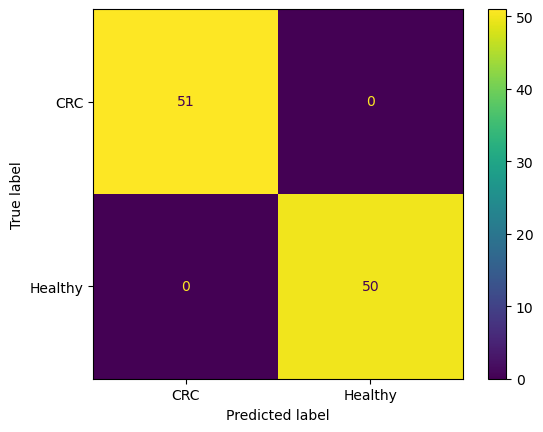

              precision    recall  f1-score   support

         CRC       1.00      1.00      1.00        51
     Healthy       1.00      1.00      1.00        50

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



In [8]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

# Define parameters for RF model
params = {
    'n_estimators': [200, 500],
    'max_features': [0.1, 0.2, 0.3],
}

# Initialize RF classifier
rf_model = RandomForestClassifier(bootstrap=True, random_state=42)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparamter set search
grid_search = GridSearchCV(estimator=rf_model, param_grid=params, scoring='accuracy', cv=cv)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Validate on test set
test_score = grid_search.best_estimator_.score(X_test, y_test)
print("Test Set Accuracy:", test_score)

y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['CRC', 'Healthy'])
plt.figure(figsize=(8, 6))
cm_display.plot()
plt.show()

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=['CRC', 'Healthy'])
print(report)


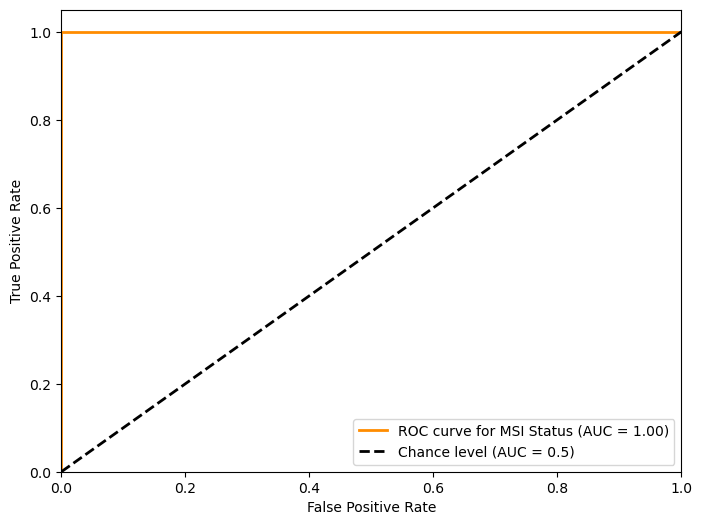

In [9]:
# AUROC curve

y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve for MSI Status (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, label=f'Chance level (AUC = 0.5)', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

C:\Users\Zhongyuan\AppData\Local\Temp\ipykernel_20120\492831797.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[top_20_indices], y=feature_names[top_20_indices], palette="viridis")


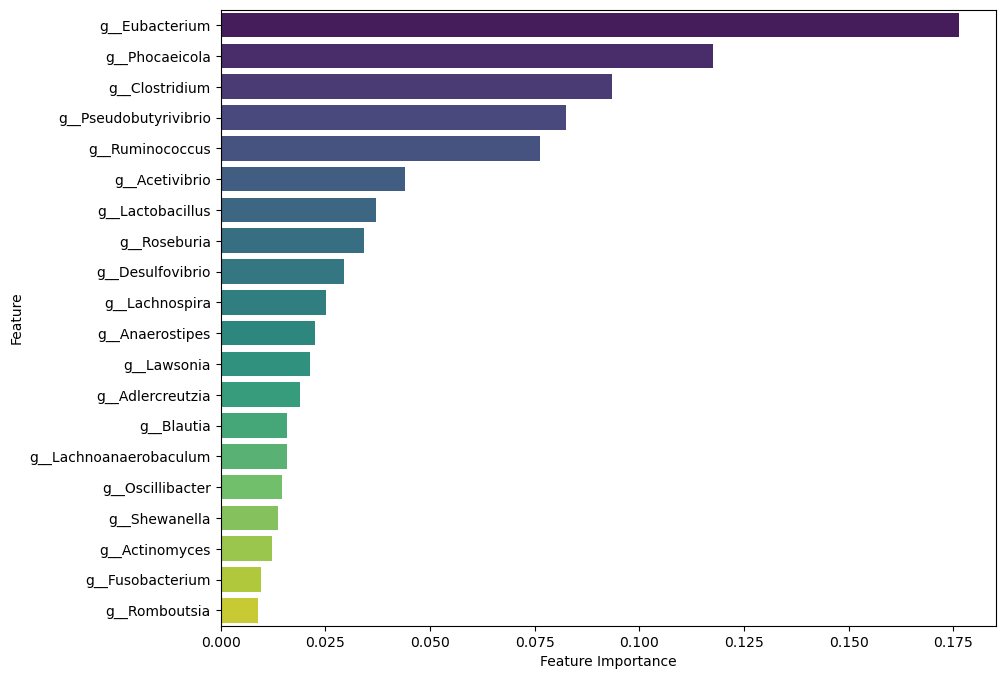

In [10]:
# Extract the best model
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

feature_importances = best_rf_model.feature_importances_
top_20_indices = feature_importances.argsort()[::-1][:20]
feature_names = X.columns

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances[top_20_indices], y=feature_names[top_20_indices], palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

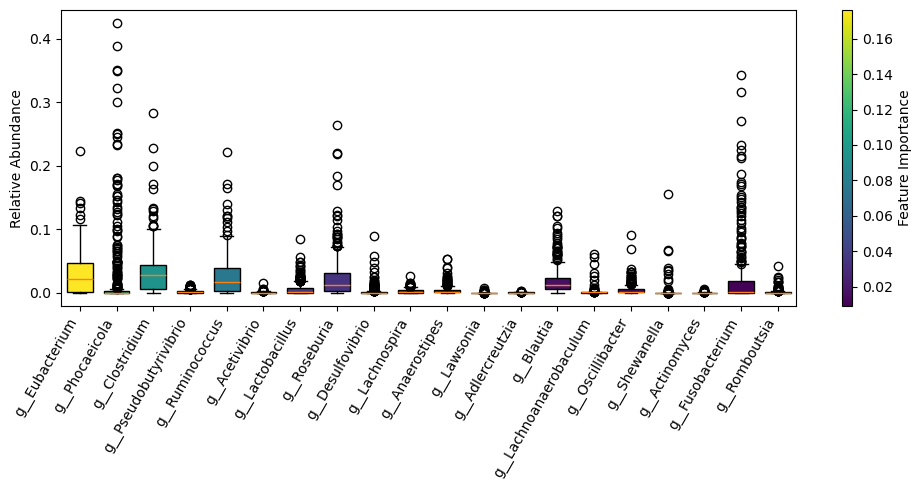

In [11]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

top_20_feature_names = feature_names[top_20_indices]

# Normalize feature importances
norm = Normalize(vmin=min(feature_importances[top_20_indices]), vmax=max(feature_importances[top_20_indices]))
cmap = plt.get_cmap('viridis')  # Choose a colormap
colors = [cmap(norm(importance)) for importance in feature_importances[top_20_indices]]

data = {}

for column_name in top_20_feature_names:
    data[column_name] = X[column_name]

fig, ax = plt.subplots(figsize=(10, 5))

# Plot each box with the corresponding color based on feature importance
for i, (key, value) in enumerate(data.items()):
    box = ax.boxplot(value, positions=[i + 1], widths=0.7, patch_artist=True,
                     boxprops=dict(facecolor=colors[i], color='black'),
                     whiskerprops=dict(color='black'))

ax.set_ylabel('Relative Abundance', fontsize=10)
ax.set_xticks(range(1, len(data) + 1))
ax.set_xticklabels(data.keys(), rotation=60, ha='right', fontsize=10)
plt.tight_layout()

# Add colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for colorbar, not for plotting
cbar = plt.colorbar(sm, ax=ax, aspect=30)
cbar.set_label('Feature Importance', fontsize=10)

plt.show()

In [12]:
# ML framework

from sklearn.metrics import precision_score, recall_score, f1_score

# Define parameters for RF model
params = {
    'n_estimators': [200, 500],
    'max_features': [0.1, 0.2, 0.3],
}

rf_model = RandomForestClassifier(bootstrap=True, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

n_iterations = 20
robustness_train_scores = []
robustness_test_scores = []
robustness_auroc = []
precision_scores = []
recall_scores = []
f1_scores = []
important_features = []

for i in range(n_iterations):

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=i, stratify=y)

    grid_search = GridSearchCV(estimator=rf_model, param_grid=params, scoring='accuracy', cv=cv)
    grid_search.fit(X_train, y_train)

    # Evaluate the model on the training data of the resampled set
    train_score = grid_search.best_score_
    robustness_train_scores.append(train_score)

    # Evaluate the model on the test data of the resampled set
    y_pred = grid_search.best_estimator_.predict(X_test)
    test_score = accuracy_score(y_test, y_pred)
    robustness_test_scores.append(test_score)
    
    # Calculate AUROC score
    y_test_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
    test_auroc = roc_auc_score(y_test, y_test_proba)
    robustness_auroc.append(test_auroc)

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Extract the best model's parameters and feature importances
    best_params = grid_search.best_params_
    best_rf_model = RandomForestClassifier(random_state=i, **best_params)
    best_rf_model.fit(X_train, y_train)

    feature_importances = best_rf_model.feature_importances_
    top_20_indices = feature_importances.argsort()[::-1][:20]
    feature_names = X.columns
    top_20_features = feature_names[top_20_indices]
    important_features.extend(top_20_features)


robustness_train_mean = np.mean(robustness_train_scores)
robustness_train_std = np.std(robustness_train_scores)

robustness_test_mean = np.mean(robustness_test_scores)
robustness_test_std = np.std(robustness_test_scores)

robustness_auroc_mean = np.mean(robustness_auroc)
robustness_auroc_std = np.std(robustness_auroc)

# Calculate mean and standard deviation for precision, recall, and F1 score
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)

print("Train Mean Accuracy:", robustness_train_mean)
print("Train Std Accuracy:", robustness_train_std)
print("Test Mean Accuracy:", robustness_test_mean)
print("Test Std Accuracy:", robustness_test_std)
print("Mean AUROC:", robustness_auroc_mean)
print("Std AUROC:", robustness_auroc_std)
print("Mean Precision:", mean_precision)
print("Std Precision:", std_precision)
print("Mean Recall:", mean_recall)
print("Std Recall:", std_recall)
print("Mean F1 Score:", mean_f1)
print("Std F1 Score:", std_f1)


Train Mean Accuracy: 0.9998750000000001
Train Std Accuracy: 0.0005448623679425968
Test Mean Accuracy: 1.0
Test Std Accuracy: 0.0
Mean AUROC: 1.0
Std AUROC: 0.0
Mean Precision: 1.0
Std Precision: 0.0
Mean Recall: 1.0
Std Recall: 0.0
Mean F1 Score: 1.0
Std F1 Score: 0.0


In [13]:
print(f"Train_accuracy_scores: {robustness_train_scores}" )
print(f"Test_accuracy_scores: {robustness_test_scores}" )
print(f"Test_AUROC_scores: {robustness_auroc}" )
print(f"precision_scores: {precision_scores}" )
print(f"recall_scores: {recall_scores}" )
print(f"f1_scores: {f1_scores}" )


Train_accuracy_scores: [1.0, 1.0, 1.0, 1.0, 0.9974999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Test_accuracy_scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Test_AUROC_scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
precision_scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
recall_scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
f1_scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [14]:
# The list of important features
print("Total number of selected features:", len(important_features))
important_features = pd.DataFrame(important_features)
important_features.to_csv('FI_RF_SGFMGBA_HC.csv', index=False)

Total number of selected features: 400
